In [3]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ImagePos = r'E:\GithubProjects\Programming-Helper\Cafe-Data\Playcity-Block-Map\imgs'
ImagePosList = os.listdir(ImagePos)

In [5]:
ImageArray = []
for pos in ImagePosList:
	ImageArray.append(cv.imread(f"{ImagePos}/{pos}"))
ImageArray = np.array(ImageArray)

C:\Users\th070\AppData\Local\Temp\ipykernel_10932\1922165642.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ImageArray = np.array(ImageArray)


In [6]:
ImageArray.shape

(189,)

In [7]:
ImageArray[0].shape

(1600, 1600, 3)

In [8]:
ImageCount, Height, Width, RGBChannel = ImageArray.shape[0], ImageArray[0].shape[0], ImageArray[0].shape[1], ImageArray[0].shape[2]

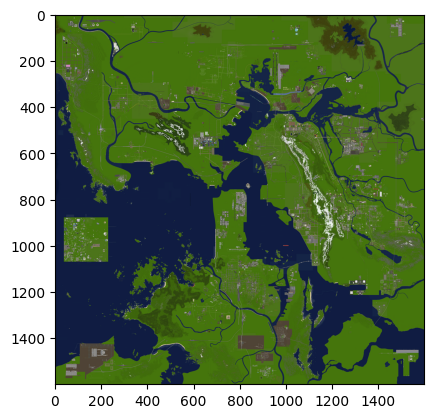

In [9]:
plt.imshow(cv.cvtColor(ImageArray[0], cv.COLOR_BGR2RGB))

In [ ]:
ShowImage = np.zeros((Height, Width))
LastImage = np.zeros((Height, Width, RGBChannel))
for i in range(ImageCount-1, -1, -1):
	ChangedValue = (ImageArray[i] - LastImage)
	ChangedValue[ChangedValue != 0] = 1
	# ChangedValue = [np.ones(3) if (ChangedValue[y][x] != np.zeros(3)).all() else np.zeros(3) for y in range(Height) for x in range(Width)]
	# ChangedValue = np.array(ChangedValue).reshape((Height , Width , 3))

	# ChangedValue = np.in1d(ChangedValue, [1]).reshape((Height,Width, 3))
	# ChangedValue = ChangedValue.reshape((Height * Width * 3))
	ChangedValue = ChangedValue[:,:,0] + ChangedValue[:,:,1] + ChangedValue[:,:,2]
	ChangedValue[ChangedValue != 0] = 1
	


	# print(ChangedValue[:,:])
	# ChangedValue[Mask] = np.array([1, 1, 1])
	# for y in range(Height):
	# 	for x in range(Height):
	# 		MaxValue = ChangedValue[y,x].max()
	# 		ChangedValue[y,x] = np.array([MaxValue, 0, 0])
	ShowImage = ShowImage + ChangedValue
	# if i == ImageCount - 1:
	# 	print(ChangedValue.reshape((Height*Width,3)))
	# 	break
	# print(ShowImage[0][0])
	print(i)

	LastImage = ImageArray[i]

ShowImage = ShowImage.astype('int16')

77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


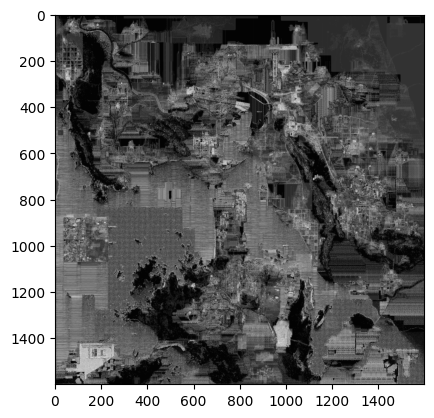

In [ ]:
plt.imshow(ShowImage, cmap='gray')

애니메이션으로

In [10]:
import matplotlib.animation as animation

188
187
186
185
184
183
182
181
180
179
178
177
176
175
174
173
172
171
170
169
168
167
166
165
164
163
162
161
160
159
158
157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


MovieWriter imagemagick unavailable; using Pillow instead.


0


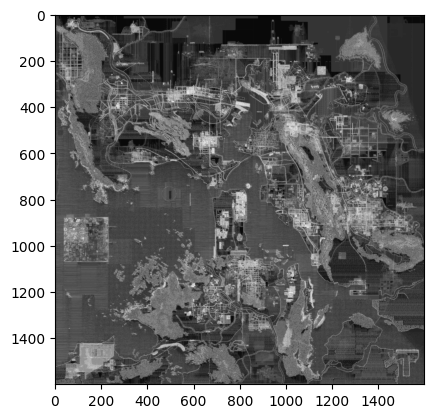

In [12]:
fig, ax = plt.subplots()

ShowImage = np.zeros((Height, Width))
LastImage = np.zeros((Height, Width, RGBChannel))
Images = []
for i in range(ImageCount-1, -1, -1):
	ImageArray[i] = cv.resize(ImageArray[i], (Height, Width))

	ChangedValue = (ImageArray[i] - LastImage)
	ChangedValue[ChangedValue != 0] = 1
	ChangedValue = ChangedValue[:,:,0] + ChangedValue[:,:,1] + ChangedValue[:,:,2]
	ChangedValue[ChangedValue != 0] = 1
	ShowImage = ShowImage + ChangedValue
	ShowImage = ShowImage.astype('int16')
	Images.append([ax.imshow(ShowImage, cmap='gray')])
	print(i)

	LastImage = ImageArray[i]

ani = animation.ArtistAnimation(fig, Images, interval=100)
ani.save(r'E:\GithubProjects\Programming-Helper\Cafe-Data\Playcity-Block-Map\result.gif',writer='imagemagick')
plt.show()